In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic 2')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This dataset containsthe details of passengers in which both numerical and categorical data are present.here the 'survived' is 
the target variable.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

This shows the name of each columns present in the data set.

# Exploratory Data Analysis

In [6]:
df.shape

(891, 12)

there are 891 rows and 12 columns presnt in the data set.

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is null values in Age,cabin and Embarked columns. This columns will need to be filled up as approriate 
or removed.

In [11]:
df.isnull().sum().sum()

866

there are 866 null values. this is a huge number and we will replace them as oppose to remove them.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from the information above, we can say the dtypes matches the columns. 
we can also see the there are NaN values presnt in the data set

<Axes: >

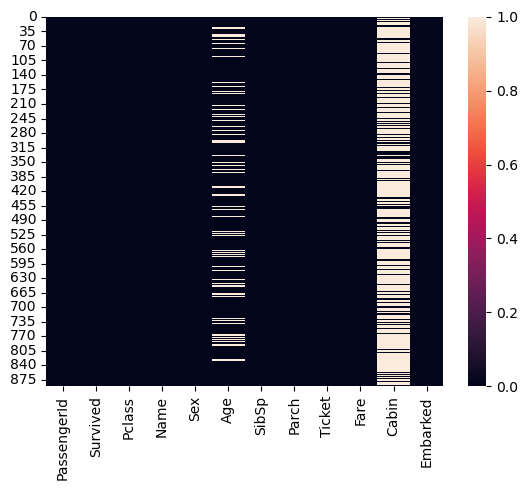

In [13]:
sns.heatmap(df.isnull())

we can see the the missing values on the heatmap

In [14]:
for m in df.columns:
    print(df[m].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

we can see that there are two class present in our target variable and as such it is a binary classification problem.

# filling the missing values

In [15]:
df['Age'].replace(np.NaN,df['Age'].mean,inplace=True)

In [19]:
df['Cabin'].replace(np.NaN,df['Cabin'].mode)

0      <bound method Series.mode of 0       NaN\n1   ...
1                                                    C85
2      <bound method Series.mode of 0       NaN\n1   ...
3                                                   C123
4      <bound method Series.mode of 0       NaN\n1   ...
                             ...                        
886    <bound method Series.mode of 0       NaN\n1   ...
887                                                  B42
888    <bound method Series.mode of 0       NaN\n1   ...
889                                                 C148
890    <bound method Series.mode of 0       NaN\n1   ...
Name: Cabin, Length: 891, dtype: object

because the column could notbe replace because it contain alphanum data we will drop it

In [21]:
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df['Embarked'].replace(np.NaN,df['Embarked'].mode)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(889, 11)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

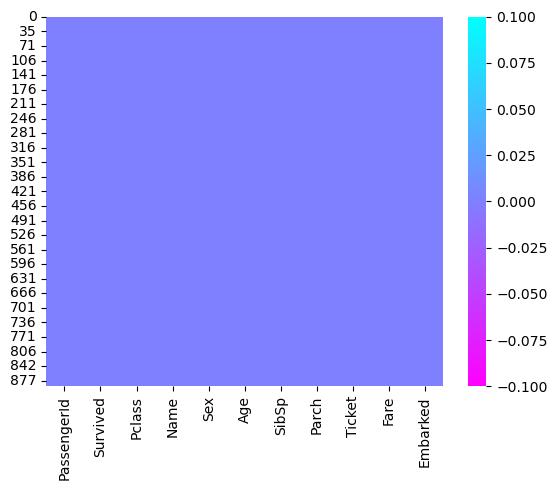

In [27]:
sns.heatmap(df.isnull(),cmap='cool_r')

# seperating Numerical and categorical data

In [28]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:', categorical_col)
print('\n')

categorical columns: ['Name', 'Sex', 'Age', 'Ticket', 'Embarked']




In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [33]:
df['Age'].dtype

dtype('O')

In [34]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [38]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [39]:
df['Age'].dtype

dtype('float64')

In [59]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:', categorical_col)
print('\n')

categorical columns: ['Sex', 'Age', 'Ticket', 'Embarked']




In [60]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:', numerical_col)
print('\n')

numerical columns: ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']




In [61]:
df.nunique().to_frame('No of unique value')

,No of unique value
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,680
Fare,247
Embarked,3


These are unique values present in the Data. the  name and the passenger Id have a unique value to the 
passengers. this can be dropped.

In [44]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [48]:
df.shape

(889, 9)

In [47]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

The problem statement already defined 0 as No and 1 as yes, There is also a case of class imbalance in the target variable. this will be handled later.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    object 
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [51]:
df['Age'].isnull().sum()

177

In [56]:
df['Age'].replace(np.NaN,df['Age'].mean,inplace=True)

In [57]:
df['Age'].dtypes

dtype('O')

In [58]:
df['Age'].isnull().sum()

0

# Descriptive dataset

In [62]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681
std,0.486260,0.834700,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


This give statistical information of the numerical columns. the summary looks perfect since there is no negative/invalid present.
the following can be observed from the above.
1.the counts of all the columns are same which means there are no missing values
2.The std is within the limit which shows that the dataset are normally distributed except in fare
3.the mean in Fare is greater than the median which suggest that the column Fare is skewed to the right
4.there is high difference between max value and 75percentile in Fare columns while suggest that there is an outlier present in the column
5.other columns except the fare column are categorical in nature.

# Data visualization

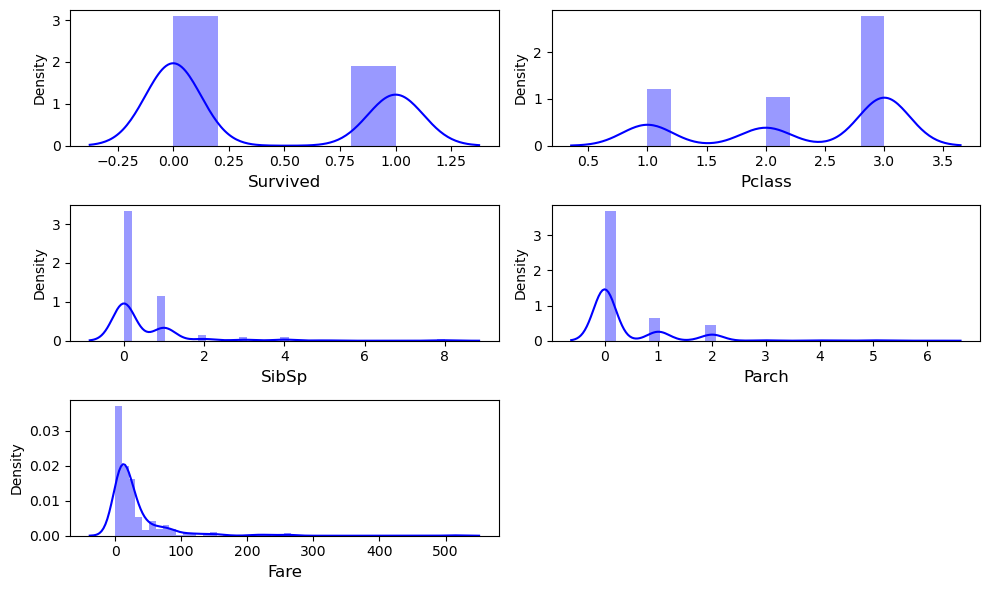

In [66]:
plt.figure(figsize=(10,6),facecolor='white')
new =1
for col in numerical_col:
    if new<=5:
        ax=plt.subplot(3,2,new)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    new +=1
plt.tight_layout()

from this plot we can further affirm that the numerical data are categoricalexcept
for column fare which is skewed to the right

male      577
female    312
Name: Sex, dtype: int64


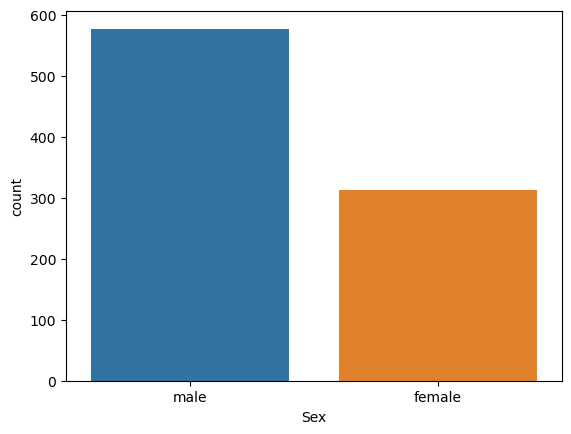

In [80]:
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

this shows that the Sex is classified into two male and females, It also shows that there are more male
compare to femal in Titanic

0    549
1    340
Name: Survived, dtype: int64


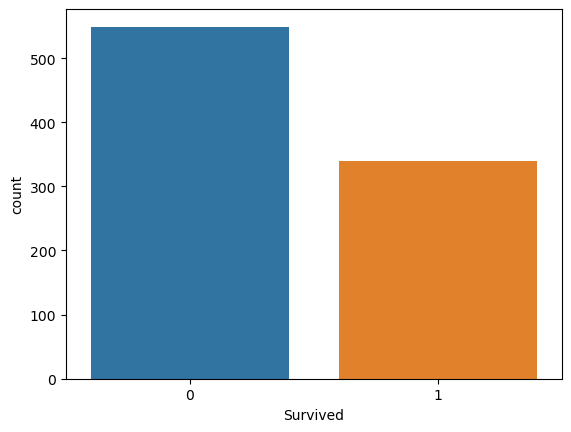

In [81]:
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

this shows that most people didn't survive the accident.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


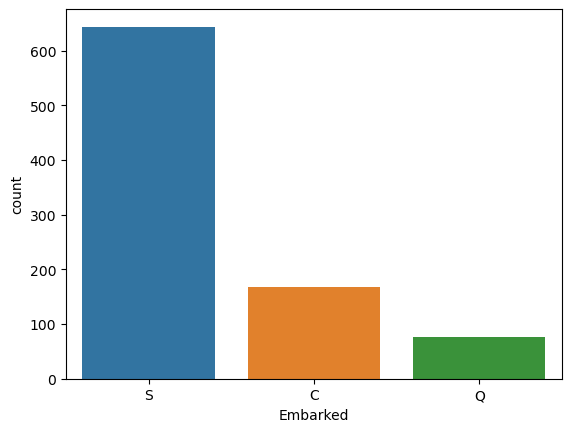

In [82]:
sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

this discription shows that most people got on the ship at the port of southampton and least got on it
at port of Queenstown

3    491
1    214
2    184
Name: Pclass, dtype: int64


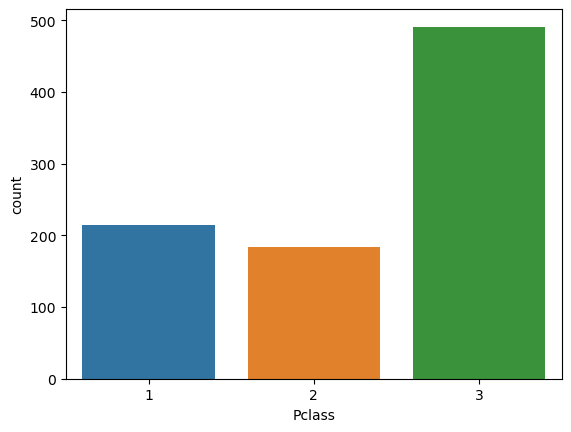

In [83]:
sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

this distribution shows that most of the passenger on the ship are 3rd class passenger and the least class is 2nd class passenger

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


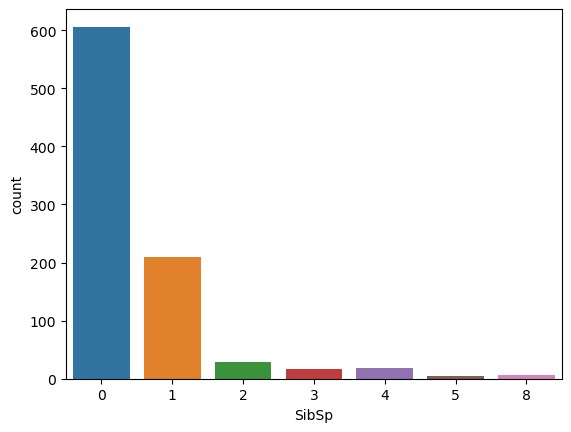

In [84]:
sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

This distribution shows that most passenger have no siblings or spouse on the ship.
it also the number of passenger with the least siblings or spouse onboard.  

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


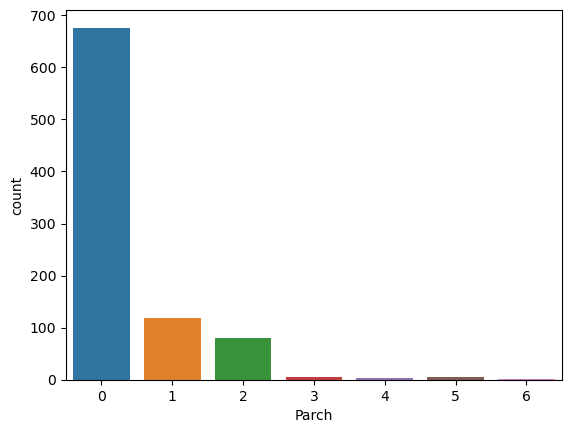

In [85]:
sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

This shows the number of parent/children on the ship. from here we can see that most people are
not parent or children. 

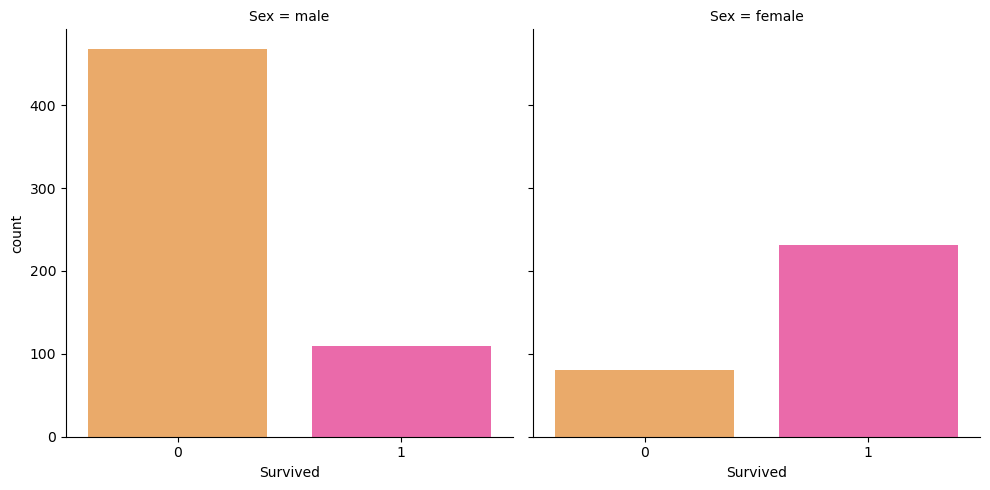

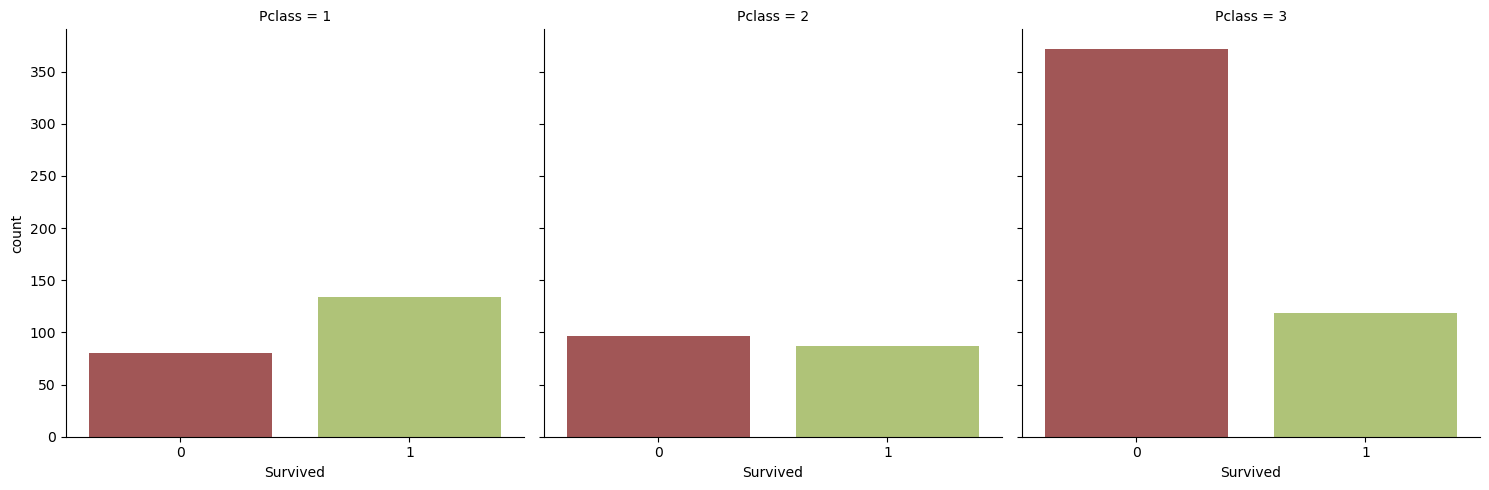

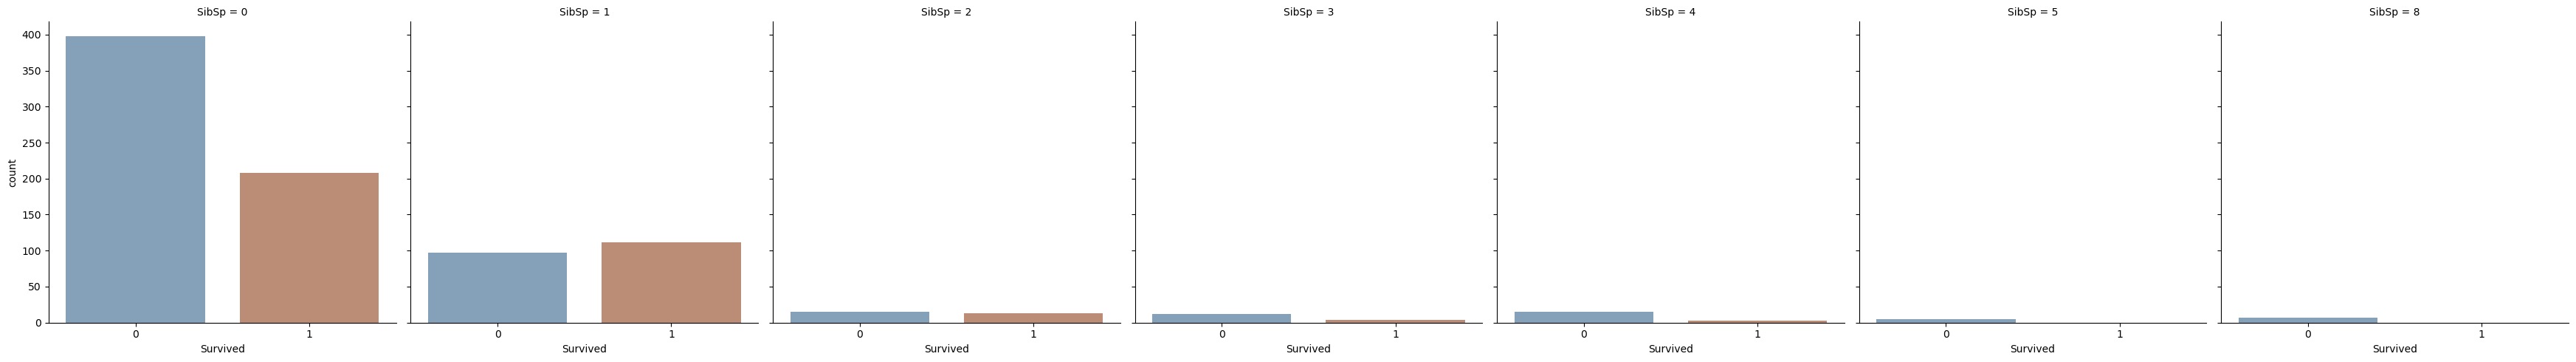

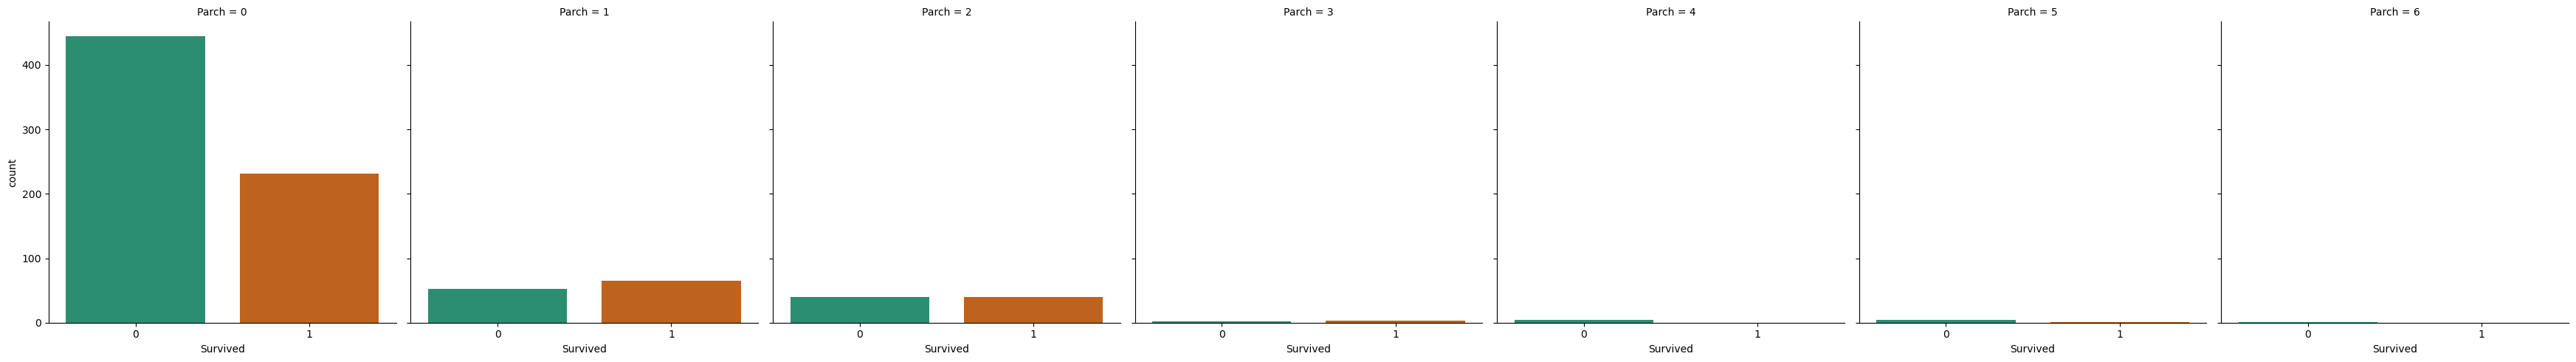

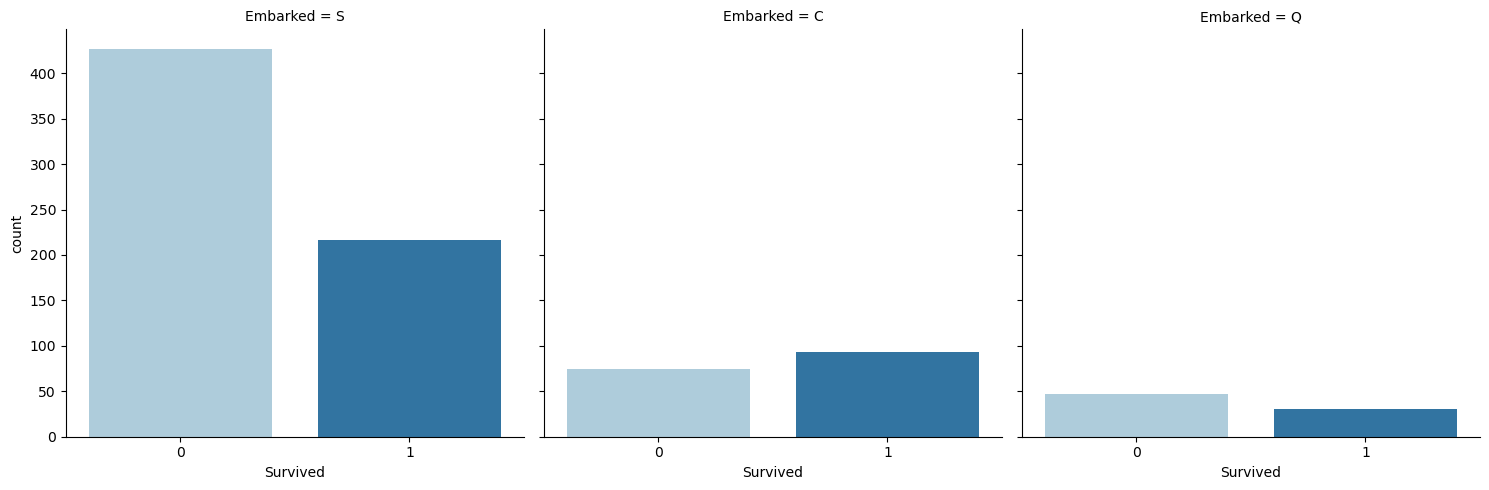

In [88]:
sns.catplot(x='Survived',col='Sex', data=df, kind='count', palette='spring_r')
sns.catplot(x='Survived',col='Pclass', data=df, kind='count', palette='tab20b_r')
sns.catplot(x='Survived',col='SibSp', data=df, kind='count', palette='twilight_shifted')
sns.catplot(x='Survived',col='Parch', data=df, kind='count', palette='Dark2')
sns.catplot(x='Survived',col='Embarked',data=df,kind='count',palette='Paired')

plt.show()

This is checking the survivers in various columns;
1.in the first plot we see that there is a significant difference in the survivals in the Sex column, Females survival rate is higher than male.
2.in the second plot we can see that most passengers who didn't survive were seated in the 3rd class. 
3. in the third plot we can see that most people who didn't survive are have no siblings or spouse aboard.
4. from the fourth plot we can see that larger number of those who didn't survive have no parent or children onboard.
5. from the fifth plot we can see that larger percentage of those who didn't survive embarked at the port of southamton.

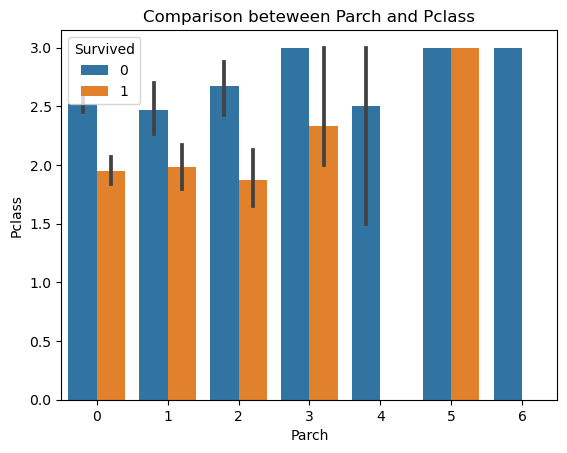

In [93]:
plt.title('Comparison beteween Parch and Pclass')
sns.barplot(x='Parch', y='Pclass',data=df,hue='Survived')
plt.show()

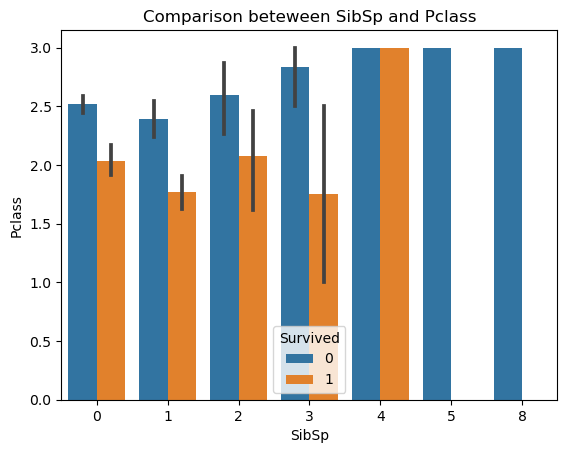

In [94]:
plt.title('Comparison beteween SibSp and Pclass')
sns.barplot(x='SibSp', y='Pclass',data=df,hue='Survived')
plt.show()

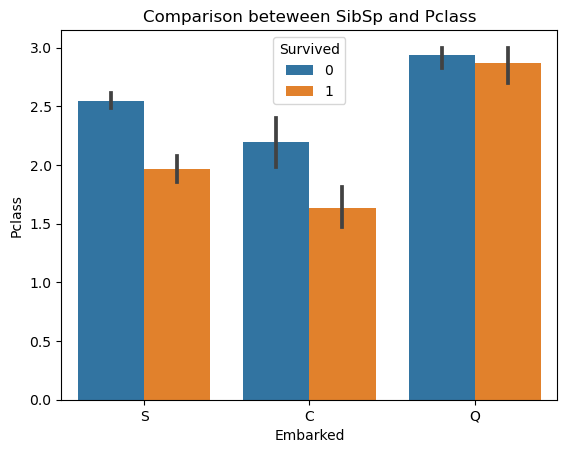

In [96]:
plt.title('Comparison beteween SibSp and Pclass')
sns.barplot(x='Embarked', y='Pclass',data=df,hue='Survived')
plt.show()

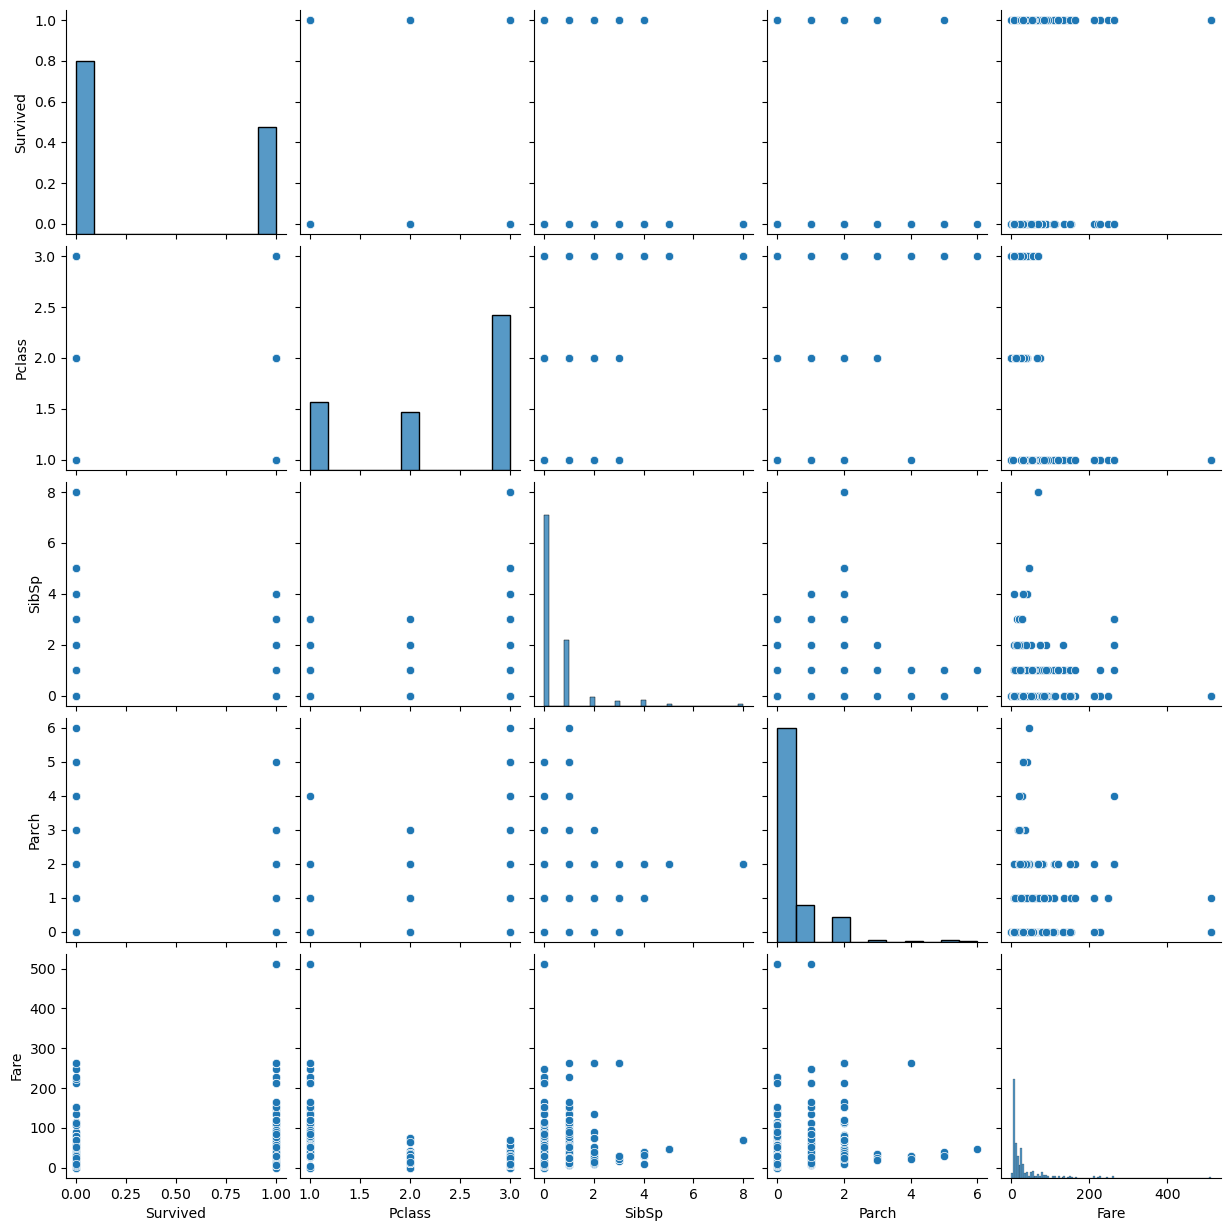

In [97]:
sns.pairplot(df)

The pairplot give the pairwise rotation between features 

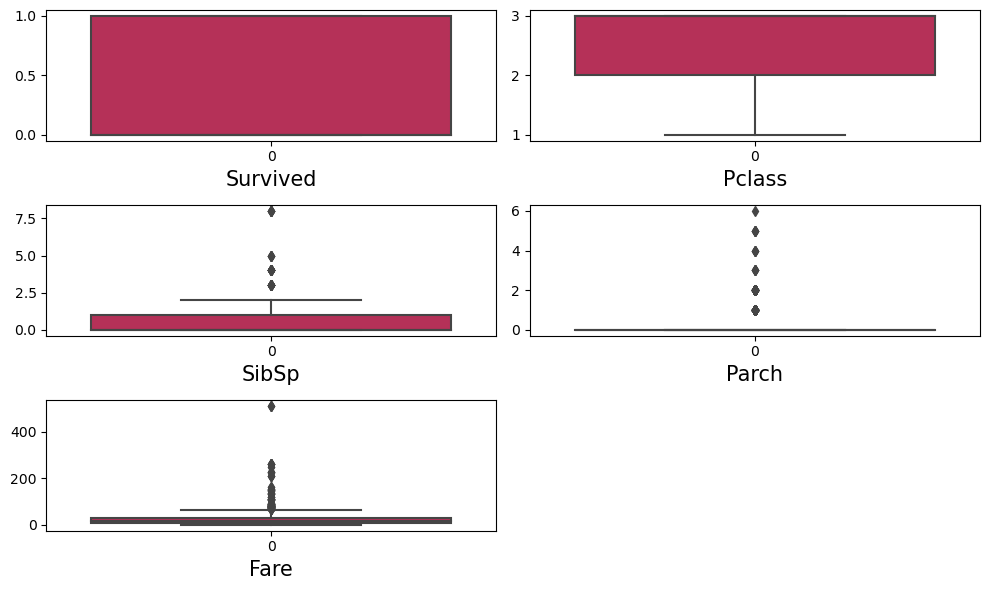

In [99]:
plt.figure(figsize=(10,6),facecolor='white')
out=1
for col in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,out)
        sns.boxplot(df[col],palette='rocket')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    out+=1
plt.tight_layout()

from the boxplot above we can see outliers from sibsp, parch and Fare columns.
the parch and sibsp are categorical and as such we won't remove the outliers.
the fare is a continous data and we will remove the outliers from this column.

In [101]:
from scipy.stats import zscore
outliers=df[['Fare']]
z=np.abs(zscore(outliers))
z

,Fare
0,0.500240
1,0.788947
2,0.486650
3,0.422861
4,0.484133
...,...
886,0.384475
887,0.042213
888,0.174084
889,0.042213


In [102]:
np.where(z>3)

(array([ 27,  87, 117, 257, 298, 310, 340, 376, 379, 437, 526, 556, 678,
        688, 699, 715, 729, 736, 741, 778], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [103]:
df1=df[(z<3).all(axis=1)]
df1.shape

(869, 9)

In [104]:
print('old dataframe:', df.shape[0])
print('new dataframe:', df1.shape[0])

old dataframe: 889
new dataframe: 869


In [105]:
print('Data loss percentage:', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 2.249718785151856


In [106]:
df=df1

In [108]:
df.skew()

Survived    0.516656
Pclass     -0.703868
SibSp       3.760182
Parch       2.845022
Fare        2.273026
dtype: float64

the skewness of sibsp,parch and fare is not in range 
we will leave sibsp and parch as it is because the data is categorical
skewness will be removed from Fare column

In [109]:
df['Fare']=np.cbrt(df['Fare'])

In [110]:
df.skew()

Survived    0.516656
Pclass     -0.703868
SibSp       3.760182
Parch       2.845022
Fare        0.620692
dtype: float64

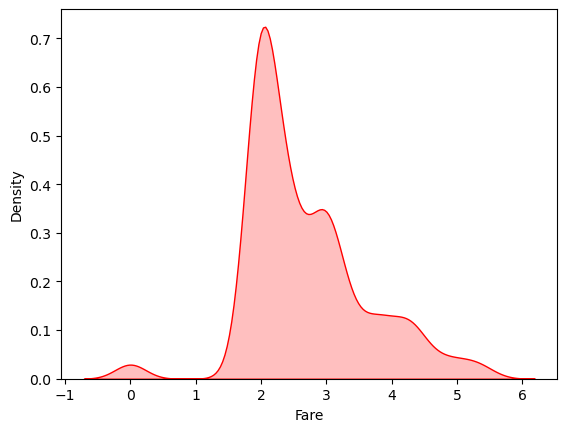

In [111]:
sns.distplot(df['Fare'],color='r',kde_kws={'shade':True},hist=False)
plt.show()

the Fare columns looks normally distributed now

# Encoding 

In [114]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,519.0,1.935438,2.0
1,1,1,0.0,38.0,1,0,590.0,4.146318,0.0
2,1,3,0.0,26.0,0,0,660.0,1.993730,2.0
3,1,1,0.0,35.0,1,0,47.0,3.758647,2.0
4,0,3,1.0,35.0,0,0,468.0,2.004158,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,98.0,2.351335,2.0
887,1,1,0.0,19.0,0,0,14.0,3.107233,2.0
888,0,3,0.0,NaN,1,2,666.0,2.862294,2.0
889,1,1,1.0,26.0,0,0,8.0,3.107233,0.0


In [113]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [117]:
df.drop('Age',axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  869 non-null    int64  
 1   Pclass    869 non-null    int64  
 2   Sex       869 non-null    float64
 3   SibSp     869 non-null    int64  
 4   Parch     869 non-null    int64  
 5   Ticket    869 non-null    float64
 6   Fare      869 non-null    float64
 7   Embarked  869 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 61.1 KB


In [119]:
df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.375144,2.341772,0.654776,0.518987,0.367089,333.622555,2.677154,1.552359
std,0.484439,0.819895,0.475715,1.102436,0.793042,197.625986,0.916801,0.779096
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,158.000000,1.991279,1.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,332.000000,2.401983,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,510.000000,3.107233,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,671.000000,5.483329,2.000000


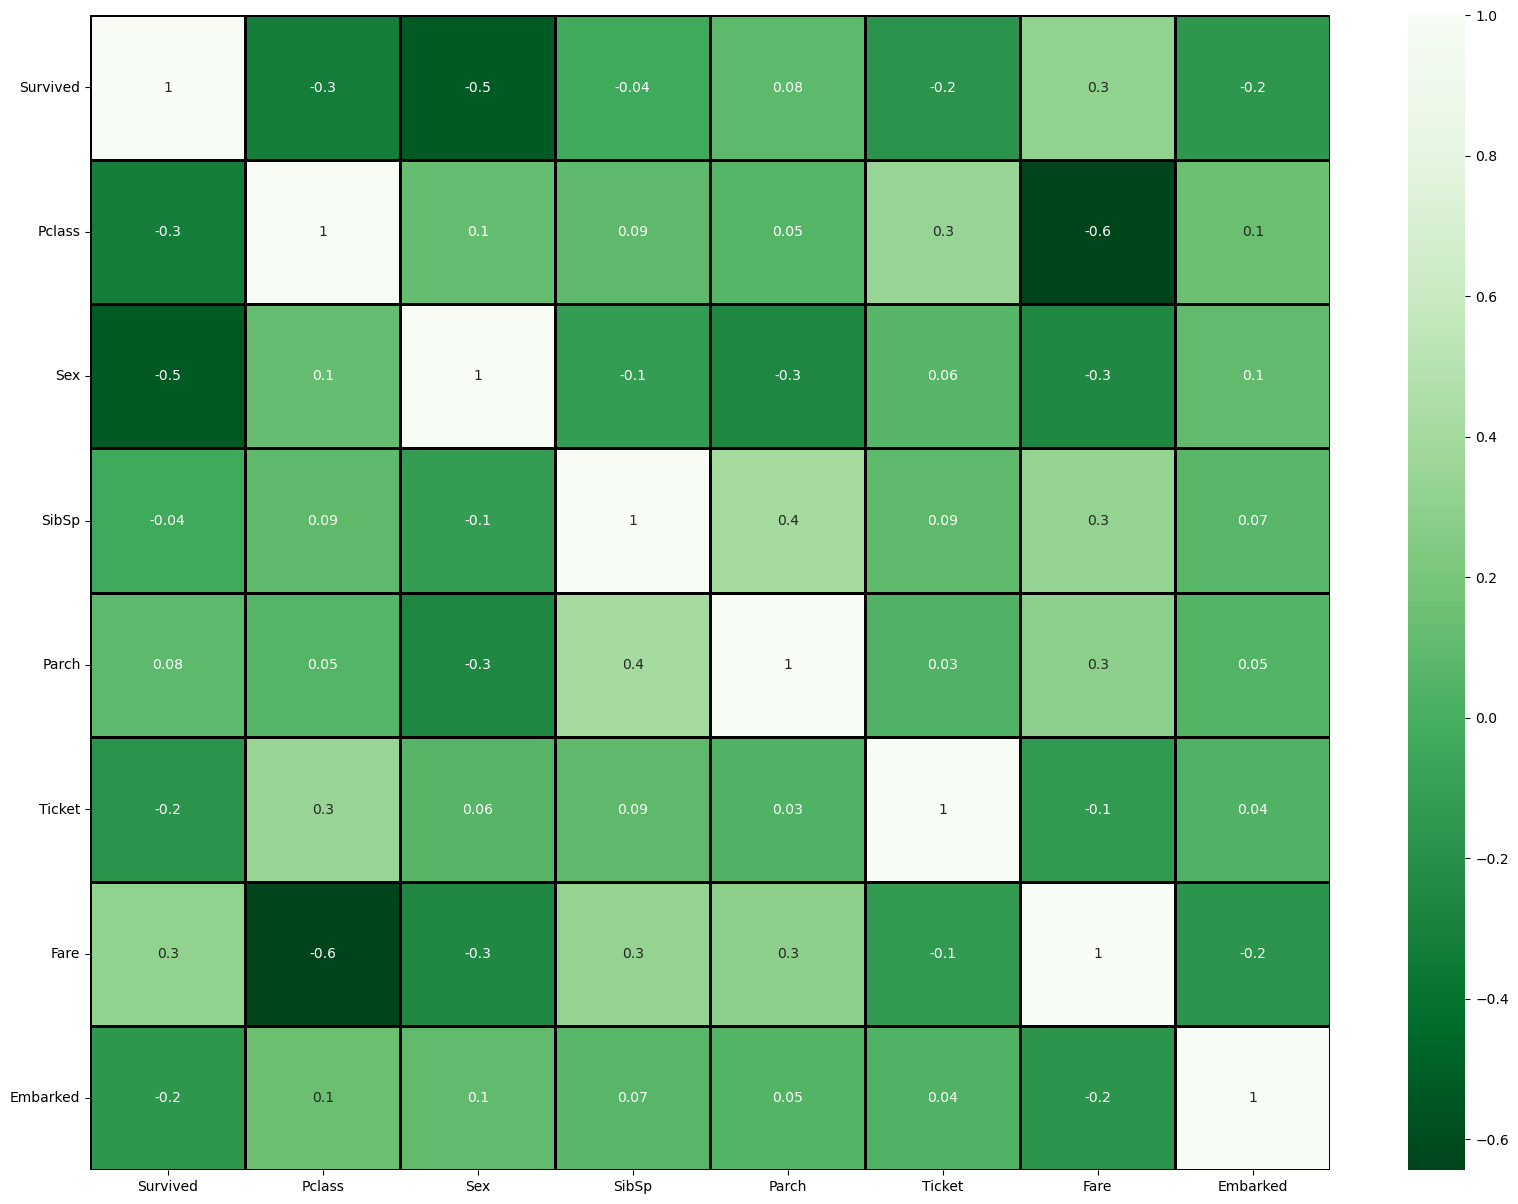

In [120]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0-1,fmt='.1g',linecolor='black', annot=True,cmap='Greens_r')
plt.yticks(rotation=0)
plt.show()

there is no much correlation between the target and the features.
there is less correllation between Pclass, fare and target.
there is moderate correlation between sex and target.
the correlation between the target, parch and sibsp is minimal.

In [123]:
 cor=df.corr()

In [124]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.316985
Parch       0.081954
SibSp      -0.039239
Embarked   -0.158939
Ticket     -0.176653
Pclass     -0.326075
Sex        -0.532191
Name: Survived, dtype: float64

In [125]:
cor

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.326075,-0.532191,-0.039239,0.081954,-0.176653,0.316985,-0.158939
Pclass,-0.326075,1.000000,0.113813,0.092867,0.049567,0.343698,-0.644166,0.138783
Sex,-0.532191,0.113813,1.000000,-0.112701,-0.253077,0.061097,-0.251850,0.104778
SibSp,-0.039239,0.092867,-0.112701,1.000000,0.409084,0.090514,0.323688,0.065572
Parch,0.081954,0.049567,-0.253077,0.409084,1.000000,0.034905,0.299543,0.048103
Ticket,-0.176653,0.343698,0.061097,0.090514,0.034905,1.000000,-0.134427,0.035401
Fare,0.316985,-0.644166,-0.251850,0.323688,0.299543,-0.134427,1.000000,-0.174445
Embarked,-0.158939,0.138783,0.104778,0.065572,0.048103,0.035401,-0.174445,1.000000


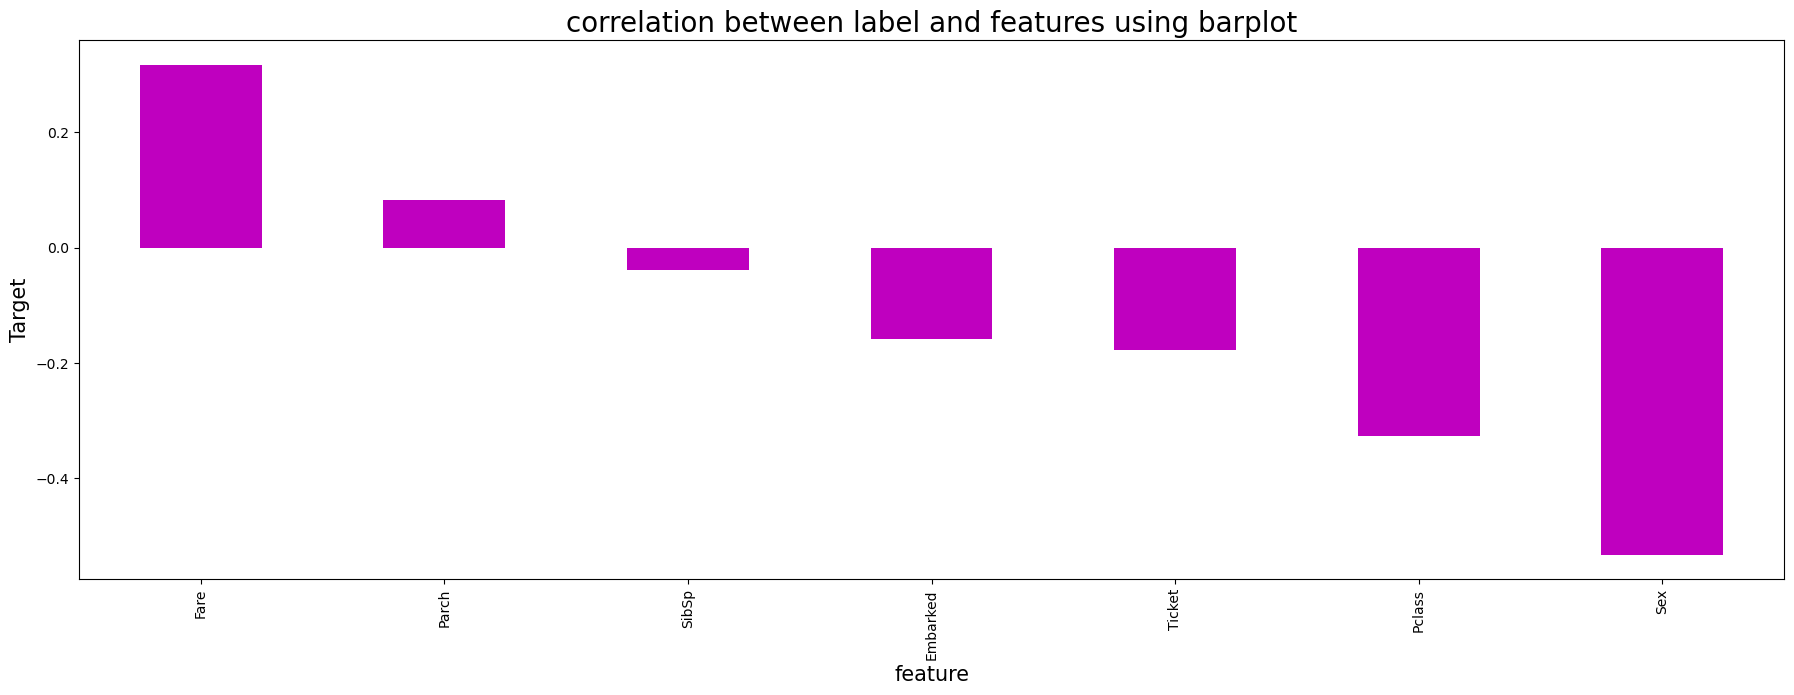

In [126]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features using barplot',fontsize=20)
plt.show()

theis show that sex is the most correllated feature with survival 

# Separating the features

In [127]:
x=df.drop('Survived', axis=1)
y=df['Survived']

# Feature Scaling 

In [128]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0.803282,0.726113,0.436569,-0.463153,0.938562,-0.809492,0.574896
1,-1.637460,-1.377195,0.436569,-0.463153,1.298033,1.603411,-1.993661
2,0.803282,-1.377195,-0.471035,-0.463153,1.652442,-0.745873,0.574896
3,-1.637460,-1.377195,0.436569,-0.463153,-1.451163,1.180316,0.574896
4,0.803282,0.726113,-0.471035,-0.463153,0.680350,-0.734493,0.574896
...,...,...,...,...,...,...,...
864,-0.417089,0.726113,-0.471035,-0.463153,-1.192952,-0.355592,0.574896
865,-1.637460,-1.377195,-0.471035,-0.463153,-1.618242,0.469377,0.574896
866,0.803282,-1.377195,0.436569,2.060234,1.682819,0.202057,0.574896
867,-1.637460,0.726113,-0.471035,-0.463153,-1.648620,0.469377,-1.993661


# Checking variance inflation factor

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

,VIF values,feature
0,2.412196,Pclass
1,1.120593,Sex
2,1.453443,SibSp
3,1.369700,Parch
4,1.155200,Ticket
5,2.657493,Fare
6,1.062780,Embarked


this shows that there is no issue of multicollinearity as all the values are within range

In [130]:
y.value_counts()

0    543
1    326
Name: Survived, dtype: int64

we have class imbalance

In [131]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [132]:
y1.value_counts()

0    543
1    543
Name: Survived, dtype: int64

# modelling

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAcc=acc
        maxRS=i
print('Best accuracy is', maxAcc,'at rand_state',maxRS)

Best accuracy is 0.8159509202453987 at rand_state 299


# creating train test split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [135]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [137]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7931034482758621
[[130  22]
 [ 32  77]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       152
           1       0.78      0.71      0.74       109

    accuracy                           0.79       261
   macro avg       0.79      0.78      0.78       261
weighted avg       0.79      0.79      0.79       261



In [138]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7816091954022989
[[137  15]
 [ 42  67]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       152
           1       0.82      0.61      0.70       109

    accuracy                           0.78       261
   macro avg       0.79      0.76      0.76       261
weighted avg       0.79      0.78      0.78       261



In [139]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7701149425287356
[[139  13]
 [ 47  62]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       152
           1       0.83      0.57      0.67       109

    accuracy                           0.77       261
   macro avg       0.79      0.74      0.75       261
weighted avg       0.78      0.77      0.76       261



In [140]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8199233716475096
[[137  15]
 [ 32  77]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       152
           1       0.84      0.71      0.77       109

    accuracy                           0.82       261
   macro avg       0.82      0.80      0.81       261
weighted avg       0.82      0.82      0.82       261



In [141]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=svc.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7701149425287356
[[139  13]
 [ 47  62]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       152
           1       0.83      0.57      0.67       109

    accuracy                           0.77       261
   macro avg       0.79      0.74      0.75       261
weighted avg       0.78      0.77      0.76       261



In [142]:
BC=BaggingClassifier ()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.789272030651341
[[136  16]
 [ 39  70]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       152
           1       0.81      0.64      0.72       109

    accuracy                           0.79       261
   macro avg       0.80      0.77      0.77       261
weighted avg       0.79      0.79      0.78       261



In [143]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=svc.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7701149425287356
[[139  13]
 [ 47  62]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       152
           1       0.83      0.57      0.67       109

    accuracy                           0.77       261
   macro avg       0.79      0.74      0.75       261
weighted avg       0.78      0.77      0.76       261



# cross validation

In [145]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predRFC)-score.mean())

[0.78899083 0.76958525 0.80184332 0.85253456 0.85253456]
0.8130977043081214
difference btw accuracy score and crossvalidation score is -0.01999425603225935


In [146]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predLR)-score.mean())

[0.73853211 0.77880184 0.73271889 0.76036866 0.83410138]
0.7689045787003763
difference btw accuracy score and crossvalidation score is 0.012704616701922578


In [147]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and cross validation score is',accuracy_score(y_test,predsvc)-score.mean())

[0.79816514 0.78801843 0.76497696 0.79262673 0.83870968]
0.7964993869699405
difference btw accuracy score and cross validation score is -0.026384444441204913


In [148]:
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predGB)-score.mean())

[0.77981651 0.81105991 0.80645161 0.81105991 0.87557604]
0.8167927958398511
difference btw accuracy score and crossvalidation score is 0.00313057580765852


In [149]:
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predABC)-score.mean())

[0.73853211 0.8156682  0.79723502 0.81105991 0.85253456]
0.8030059611888556
difference btw accuracy score and crossvalidation score is -0.03289101866012001


In [150]:
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predBC)-score.mean())

[0.78440367 0.76958525 0.79723502 0.84792627 0.8202765 ]
0.803885342239885
difference btw accuracy score and crossvalidation score is -0.014613311588543954


In [151]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predET)-score.mean())

[0.78899083 0.77419355 0.78341014 0.84792627 0.84792627]
0.808489409377246
difference btw accuracy score and crossvalidation score is -0.038374466848510425


we can see that gradient boosting is the best performing model.

# Hyper parameter tunning

In [157]:
from sklearn.model_selection import GridSearchCV
parameters={'loss':['log_loss','exponential'],
          'random_state':[10,50,100,1000],
          'learning_rate':[0.1,0.2,0.3,0.5,0.8, 1.0],
          'criterion':['friedman_mse','squared_error'],
          'n_estimators':[1,5,10,50,100,200,300]}

In [158]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [159]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.8, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [1, 5, 10, 50, 100, 200, 300],
                         'random_state': [10, 50, 100, 1000]})

In [160]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'n_estimators': 50,
 'random_state': 100}

In [163]:
Final_model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.5, n_estimators=50, loss='exponential', random_state=100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

80.84291187739464


# ploting ROC curve

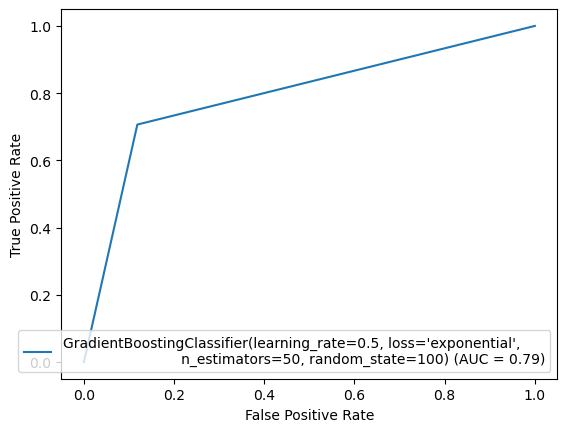

In [164]:
from sklearn import metrics
fpr,tpr, threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [165]:
import joblib
joblib.dump(Final_model,'Titanic.pkl')

['Titanic.pkl']